In [1]:
import pickle

import bayesflow as bf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tqdm import tqdm
from train import get_setup

2024-10-21 18:57:29.637964: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 18:57:29.666649: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 18:57:29.666687: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 18:57:29.666714: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 18:57:29.673147: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 18:57:29.673913: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
tasks = ["twomoons", "gmm", "invkinematics"]
simulation_budgets = [512, 1024, 2048, 4096, 8192]
estimators = ["ac", "nsf", "cmpe", "fmpe"]

eval_estimators = list(set(estimators + ["cmpe10", "cmpe30", "fmpe10", "fmpe30"]).difference({"cmpe"}))

In [3]:
colors = ["#4477AA", "#EE6677", "#228833", "#CCBB44", "#66CCEE", "#AA3377", "#BBBBBB"]

plot_settings = {
    "ac": {"name": "ACF", "color": colors[0]},
    "nsf": {"name": "NSF", "color": colors[1]},
    "fmpe": {"name": "FMPE", "color": colors[5]},
    "fmpe10": {"name": "FMPE 10#", "color": colors[2]},
    "fmpe30": {"name": "FMPE 30#", "color": colors[4]},
    "cmpe": {"name": "CMPE", "color": colors[3]},
    "cmpe10": {"name": "CMPE 10# (Ours)", "color": colors[3]},
    "cmpe30": {"name": "CMPE 30# (Ours)", "color": colors[6]},
}

In [4]:
c2st_dict = pickle.load(open("./computations/c2st_dict_budget_performance.pkl", "rb"))

In [5]:
def plot_task(task):
    f, ax = plt.subplots(1, 1, figsize=(6, 3))
    n_test_instances = c2st_dict[task][simulation_budgets[0]][eval_estimators[0]].shape[0]
    i = -2.5
    for estimator in tqdm(eval_estimators):
        if estimator == "fmpe10":
            continue
        c2st = np.array([c2st_dict[task][budget][estimator] for budget in simulation_budgets])
        ax.errorbar(
            [b + i*50 for b in simulation_budgets],
            np.mean(c2st, axis=1),
            yerr=np.std(c2st, axis=1) / np.sqrt(n_test_instances),
            fmt="o-",
            label=plot_settings[estimator]["name"],
            color=plot_settings[estimator]["color"],
            markersize=4,
            capsize=2,
            markeredgecolor="black",
            markeredgewidth=1,
            elinewidth=2,
        )
        i += 1

    # ax.set_ylim(0.50, None)
    # log y axis
    # ax.set_yscale('log')

    ax.set_xlabel("Simulation Budget", fontsize="x-large")
    ax.set_ylabel("C2ST", fontsize="x-large")

    ax.set_xticks([512, 1024, 2048, 4096, 8192])
    ax.set_xticklabels(["512", "", "2048", "4096", "8192"], fontsize="x-large")

    # x-large y ticks but dont change them
    ax.tick_params(axis="y", which="major", labelsize="x-large")
    ax.grid()

    lines, labels = plt.gca().get_legend_handles_labels()

    # reorder legend
    reordered_labels = [
        plot_settings["cmpe10"]["name"],
        plot_settings["cmpe30"]["name"],
        plot_settings["ac"]["name"],
        plot_settings["nsf"]["name"],
        plot_settings["fmpe30"]["name"],
        plot_settings["fmpe"]["name"],
    ]
    reordered_lines = [lines[labels.index(l)] for l in reordered_labels]

    # legend below plot with 1 row
    f.legend(
        reordered_lines,
        reordered_labels,
        loc="lower center",
        ncol=3,
        bbox_to_anchor=(0.5, -0.2),
        frameon=False,
        fontsize="x-large",
        labelspacing=0.15,
        markerscale=2.0,
    )
    sns.despine()
    f.tight_layout()

    return f

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 583.11it/s]


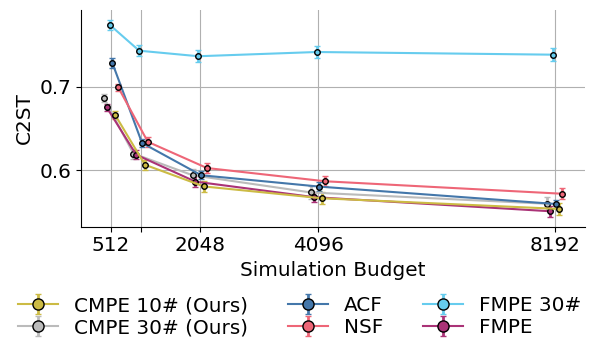

In [6]:
f = plot_task("twomoons")
f.savefig("./figures/simulation_budget_c2st_twomoons.pdf", bbox_inches="tight")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 584.65it/s]


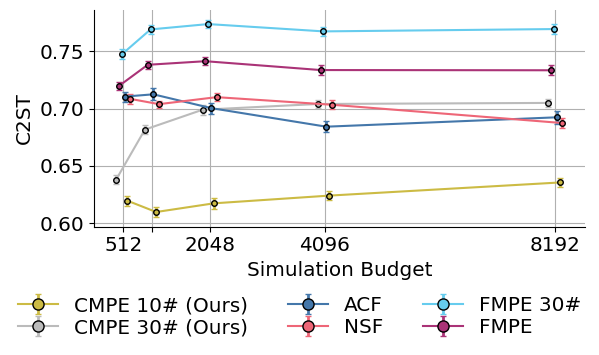

In [7]:
f = plot_task("gmm")
f.savefig("./figures/simulation_budget_c2st_gmm.pdf", bbox_inches="tight")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 633.98it/s]


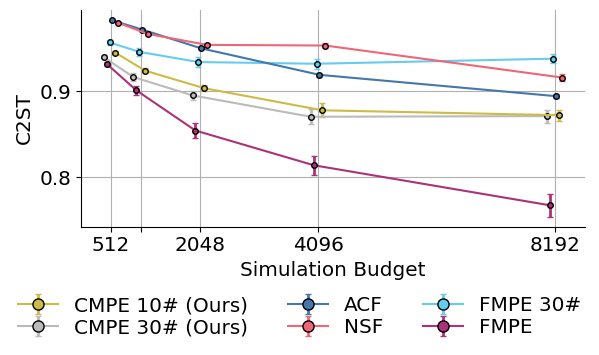

In [8]:
f = plot_task("invkinematics")
f.savefig("./figures/simulation_budget_c2st_invkinematics.pdf", bbox_inches="tight")